# Clustering of Travel Reviews


## Introduction / Overview
The dataset we will be working with in this task has no targets given. So we will investigate what the ideal number of clusters is for the dataset, the natural clusters.

We will also attempt finding which algorithm is the best at finding the natural clusters. The comparisons will be done with X different algorithms.


## The dataset

- #### What is the purpose of this dataset?
The purpose

- #### What are the features? 

The features 

- #### What are the targets? 

The targets


In [446]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from matplotlib.colors import Colormap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score

In [447]:
trip_advisor_review_csv = pd.read_csv('tripadvisor_review.csv',sep=',')
dataset = trip_advisor_review_csv.drop('User ID', axis=1)
dataset.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [448]:
#Standardize data?


## Using elbow method to find the optimal amount of clusters

The reason for choosing this method, is because it helps us determine the optimal number of clusters by plotting the variance against the number of clusters. So in essence we are trying to find a balance where adding more clusters will give us less improvements. The optimal number of clusters will capture the structure of the data without overfitting.

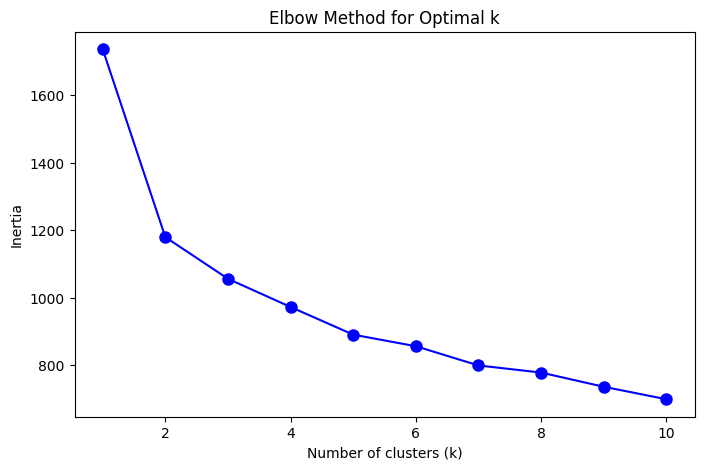

In [449]:
k_range = range(1, 11)
inertia = []

# Fit K-means for each k and store the inertia
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dataset)
    inertia.append(kmeans.inertia_)

# Plot the inertia against k
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

### Observing the drop in the graph, and deciding the the k

We can observe that the inertia of the k slows down significantly after hitting 2 cluster.There’s no clear elbow, but a noticeable bend occurs around k=3. and the curve starts flattening around k=3 to k5. So I will try both k=3 and k=4 and compare the results between the two.


In [450]:
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(dataset)

KMeans(n_clusters=3, random_state=42)

In [451]:
silhouette_score(dataset, kmeans.labels_)
silhouette_score(dataset, kmeans.predict(dataset))

np.float64(0.1951223938451225)

In [452]:
davies_bouldin_score(dataset, kmeans.labels_)

np.float64(1.8181466695307649)